In [44]:
# 1. 필요헌 module 불러오기.
import tensorflow as tf

# 2. trainng data set 
# 학습데이터.
x_data = [1,2,3]
y_data = [1,2,3]

# 3. placeholder: tensorflow 그래프에 입력을 주가 위한 파라미터 기능.
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# 4.weight, bias
# variable 함수 이용해서.
W = tf.Variable(tf.random_normal([2,2]), name = "weight") # 기울기  
b = tf.Variable(tf.random_normal([1]), name = "bias")  # 절편

# 5. Hypothesis
H = W * x +b
# 결국은 그래프 만드는 과정

# 6. Cost Function : 비용함수라는 node 만들기
# reduce_mean : 최소제곱법을 이용해서 비용함수를 프로그램적으로 정의
# 가설에서 y값을 빼고 그 값을 제곱해서 평균을 구함.
cost = tf.reduce_mean(tf.square(H-y))
# cost라는 node가 생기고, cost 구하려면 모든 node가 다 동작하게 됨.

# 7. train node 생성
# Gradient Descent 알고리즘
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)
# optimizer라는 이름으로 경사하강법 알고리즘을 지정해놨는데
# 그 optimizer 이용해서 minimize하라. minimize할 인자는 cost!
# train이라는 이름으로 변수 지정. 학습의 한 단계를 train이라고 표현함.
# 미분을 1번 하면 특정 w값에서 0과 가까워지는 방향으로 w가 이동.
# w가 이동하면서 cost의 최솟값이 되는 w까지 이동하는 것.
# optimizer 변수 만들고, 경사하강법 알고리즘을 구해놓은 함수를 씀.
# cost 함수 미분해서 w 줄여가는 것처럼, 더 작은 w값으로 이동할 수 있음.
# 미분한 값에 특정 상수를 곱해서 w를 줄여오는 방식으로 찾음. -> learning rate.
# gradient descent에서 최적화 경로를 찾았는데,
# 그 경로 상에서 많이 이동할 것인지 적게 이동할 것인지를 상수로서 지정하고, 괄호 안에 인자로 넣어줄 수 있음.
# 인자 learning_rate = 
# 정해진 값은 없음. 경험적으로 머신러닝 과정을 통해 알아내야 함.
# 기본적으로는 0.01부터 시작함 -> 늘렸다 줄였다 하면서.
# gradient_descent 이용해서 갈 방향 찾고, 그 경로 상에서 learning_rate만큼 움직여!
# 이 과정을 통해 실제로 하고자 하는 것은, cost가 최소가 되었을 때의 w값을 찾는 것.
# 그래서 w를 찾으면 그걸 cost에 적용해야 함.
# cost 값을 계속해서 줄여나감.

# optimizer도 node고, train도 node임.

# 8. 그래프 실행
# 실행시키기 위해 runner(session) 필요.
sess = tf.Session() # 그래프 실행을 위한 node
# variable을 사용하면, 학습하기 전에 반드시 초기화해야 함. -> 그래야 에러 없이 해당 변수들이 초기화되어 실행됨.
# session 만들고, session 이용해서 run!
sess.run(tf.global_variables_initializer())  # tf.global_variables_initializer : 초기화 작업.



# train 실행시키면 optimizer 통해 cost가 줄어듦.
# cost가 최소가 되는 w를 찾는 과정.
# 9. 학습 작업(learning)
# 머신러닝 작업: cost가 최소가 되는 w, b를 찾아서 -> 최적의model로서, 우리의 데이터를 가장 잘 표현하는 모델을 설정하는 것.
# 반복해서 해야 하니까, train을 여러 번 해야 함.
# train을 한 번만 하면, cost 한 번만 줄어듦.
# for 문 사용함.
for step in range(3000):                 # 총 3000번 반복해라. : train node를 3000번 실행해라. 몇 번 하는지는 상관 없음.
    # 학습을 많이 할수록 정확해짐 but 시간이 오래 걸림.
    # cost값을 줄여가야 하는데, 0과 근사한 곳까지 cost 줄여야 하는데, 적게 돌리면 그 근처까지 간다는 보장이 없음.
    # 물론 많이 한다고 해도 0 근처로 간다는 보장은 없음.
    # 학습 데이터의 size, 전체적 학습 시간을 고려해서 몇 번 반복할 지 결정해야 함.
    #sess.run(train)                               # train이 3000번 실행됨.
    # 3000번 실행되면서 cost값이 변하고, 내부적으로 random으로 잡은 w, b가 최적의 값으로 변해감.
    # 진짜 w, b,와 cost값이 제대로 변하는지 눈으로 확인해야 함.
    # 그런데 train node는 연결해주는 거지, 실제 값을 가지고 있는 것은 아님.
    # cosr를 보려면 cost 노드를, w는 w노드를, ... 실행해야 함
    # 그래서 네 개를 다 실행함. - 값을 뽑아냄.
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict = {x : x_data,
                                                     y: y_data}) # underscore : train으로 부터 얻은 값은 활용하지 않음.
                                    # w로부터 얻은값은Wval, ... 등 각각의 변수에 값을 집어 넣음.
                                    # x, y가 placeholder로 잡혀 있고, 실제 data는 위에 있는 x = 123, y =123으로 잡혀 있으니까.
                                    # 실행할 때 당연히 feed 필요함.
    if step % 300 == 0:            # 중간 중간에, 300의 배수 번째마다, 값들을 한 번씩 찍어보겠다!
        print("cost 값 : {}, b값: {}, W값: {}".format(cost_val, b_val, W_val))
        
print(sess.run(H, feed_dict = {x : 200}))
            
# 학습이 진행될수록 y =x 직선에가까워져야 하니까
# W는 1에, b는 0에, cost는 0에 가까워져야 함.

# 실행해보면?
# 실제로 그러하다.
# 결론 : cost가 0에 가까워야 가장 좋은 w, b값을 얻어낼 수 있음!

# 이렇게 가설을 만들어내는 과정 자체를 머신러닝!!1 기계학습!!1 이라고 합니당.

# tensorflow 프로그램을 통해서 어떻게 묘사하는가!
# 경향성 있는 데이터 통해 가장 적합한 가설, 모델을 찾는 것이다 -> 이 얘기를 프로그래밍적으로 묘사한 것!

InvalidArgumentError: Incompatible shapes: [2,2] vs. [3]
	 [[Node: gradients_7/mul_7_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_7/mul_7_grad/Shape, gradients_7/mul_7_grad/Shape_1)]]

Caused by op 'gradients_7/mul_7_grad/BroadcastGradientArgs', defined at:
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-a4fea950f05b>", line 51, in <module>
    train = optimizer.minimize(cost)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\training\optimizer.py", line 355, in minimize
    grad_loss=grad_loss)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\training\optimizer.py", line 456, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 609, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 375, in _MaybeCompile
    return grad_fn()  # Exit early
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 609, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\math_grad.py", line 783, in _MulGrad
    rx, ry = gen_array_ops._broadcast_gradient_args(sx, sy)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 666, in _broadcast_gradient_args
    "BroadcastGradientArgs", s0=s0, s1=s1, name=name)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'mul_7', defined at:
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 25 identical lines from previous traceback]
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-a4fea950f05b>", line 20, in <module>
    H = W * x +b
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\variables.py", line 775, in _run_op
    return getattr(ops.Tensor, operator)(a._AsTensor(), *args)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\math_ops.py", line 907, in binary_op_wrapper
    return func(x, y, name=name)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1131, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 3100, in _mul
    "Mul", x=x, y=y, name=name)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [2,2] vs. [3]
	 [[Node: gradients_7/mul_7_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients_7/mul_7_grad/Shape, gradients_7/mul_7_grad/Shape_1)]]


In [45]:
# training data set 바꾸면?
# W는 2에, b는 1에 가까워져야 함.

# 1. 필요헌 module 불러오기.
import tensorflow as tf

# 2. trainng data set 
# 학습데이터.
x_data = [1,2,3]
y_data = [1,2,3]

# 3. placeholder: tensorflow 그래프에 입력을 주가 위한 파라미터 기능.
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# 4.weight, bias
# variable 함수 이용해서.
W = tf.Variable(tf.random_normal([1]), name = "weight") # 기울기 
b = tf.Variable(tf.random_normal([1]), name = "bias")  # 절편

# 5. Hypothesis
H = W * x +b

# 6. Cost Function : 비용함수라는 node 만들기
cost = tf.reduce_mean(tf.square(H-y))

# 7. train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# 8. 그래프 실행
sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

# 9. 학습 작업(learning)
for step in range(3000):                
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict = {x : x_data,
                                                     y: y_data}) 
    if step % 300 == 0:           
        print("cost 값 : {}, b값: {}, W값: {}".format(cost_val, b_val, W_val))
        
# 10. 예측
# 학습이 끝났다! -> 최적의 W와 b를 찾아서 H를 만들었음.
# prediction  -> 가설을 실행시켜야 함.
sess.run(H, feed_dict = {x : 200})              # x가 200일 때. 알고 싶은 x값을 넣었을 때!
print(sess.run(H, feed_dict = {x : 200}))
# 실행결과 값: x = 200 넣었을 때 예측해봐라.

# 어 근데 이게 프로그램마다 다를 수 있나?

cost 값 : 4.102273941040039, b값: [0.09808019], W값: [0.12394398]
cost 값 : 0.005580991040915251, b값: [0.19676629], W값: [0.91344213]
cost 값 : 0.0013168848818168044, b값: [0.09558044], W값: [0.957954]
cost 값 : 0.00031073144054971635, b값: [0.04642882], W값: [0.979576]
cost 값 : 7.332015957217664e-05, b값: [0.02255311], W값: [0.99007887]
cost 값 : 1.7300231775152497e-05, b값: [0.01095529], W값: [0.9951808]
cost 값 : 4.082251052750507e-06, b값: [0.00532169], W값: [0.99765897]
cost 값 : 9.63285970101424e-07, b값: [0.0025851], W값: [0.9988628]
cost 값 : 2.2740177030300401e-07, b값: [0.00125605], W값: [0.9994474]
cost 값 : 5.375406075813771e-08, b값: [0.00061072], W값: [0.99973124]
[199.97406]


In [ ]:
# 실습 : 온도와 오존의 관계.
# 공기 중에 온도가 높을수록 오존량이 높아짐.
# 날짜별로 측정 data -> 대략 온도가 몇 도일때 얼마의 오존량이 발생하는가?

# 그런데 데이터가 측정값이라서 이상치가 많음.
# 머신러닝하기 전에 데이터를 정제해야 함.
# 정형화된 데이터.
# EDA를 통해 데이터 정제 후 필요한 자료만 가지고 머신러닝을 통해 온도에 따른 오존량 학습시키고 계산한다!

# 추론통계 중 regression 이용해서 어덯게 데이터를 추출할 수 있는지 살펴보는 과정.

# ozone.csv -> 측정데이터 : 온도와 오존에 대해 경향성 파악 -> linear regression

# csv 판다스 이용해서 들고 가서 -> EDA 정제 -> linear regression 예측.
# 결측치 날리고
# boxplot 그리면 이상치 나오는데 이상치 날리고


In [29]:
# 온도에 따른 ozone data 학습 후 prediction까지 진행

# 1. 필요한 모듈 불러오기
import tensorflow as tf
import pandas as pd                     # csv 읽고 데이터 전처리할 때 가장 좋은 모듈
import numpy as np                      # pandas는 내부적으로 numpy 이용
import matplotlib.pyplot as plt         # 머신러닝 들어가기 전에 데이터 경향성 확인하려면 차트 그려야 함.
                                        # scatter 그려보고, 가설 직선 그래프 그려보고.

# tensorflow를 이용해 일일이 코드로 만들어서 구현하고 있는데, 파이썬에 있는 scifi를 이용하면 한 번에 linear regression 완성 가능.
# 편하게 쓸 수는 있지만 고정되어 있어서 제어할 수 없는 형태.
# tensorflow는 제어할 수 있지만, 일일이 코드 짜야 함.

In [46]:
# 2. 학습데이터 확보
# data loading -> EDA

df = pd.read_csv("C:/Users/student/Desktop/data/ozone.csv")
df.head() # 잘 불러왔는지 확인
print("읽어들인 총 데이터의 shape : {}".format(df.shape)) # data frame 구조 : 몇 행 몇 열인지 tuple 형태로 출력

# 2.1. 결측치 처리
# 제거할 것인가? 바꿀 것인가? -> 원래 결측치가 많은데 다 제거하면 남는 게 없음.
# 결측치 중에서도 ozone, temp에 결측치 있는 것만 날려야 함. -> 내가 잘못한 부분.
# 따라서 결측치 처리하기 전에 필요한 데이터만 뽑아놔야 함.

# 1) ozone과 temp만 뽑아서 data frame을 다시 만들 것.
# fancy indexing 통해 column명만 뽑아 오기. : 여러 개의 연속되지 않은
df = df[["Ozone","Temp"]]
display(df)
# 결측치 제거할 때 다른 column에 의해 너무 많은 행이 제거되는 것을 방지하기 위해 실제 사용할 cloumn

# 2) 결측값 찾아서 제거.
# dropna() 이용
df = df.dropna(how = "any", inplace = False) # how ? -> any(어떤 것이라도 등장하면 다 날리기), 
                     # implace -> False : 원본 안 바꿈
# 결측치를 찾아서 지우고 지운 data frame을 return.
display(df)
print("결측치를 제거한 후 남은 데이터의 shape : {}".format(df.shape))
# 결측치를 지웠더니 40개 넘게 날아감. -> 1/4 가량이므로 이런 식으로 하면 안 됨.
# 바꿔주거나 해야 함.


읽어들인 총 데이터의 shape : (153, 6)


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56
...,...,...
148,30.0,70
149,NaN,77
150,14.0,75
151,18.0,76


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


결측치를 제거한 후 남은 데이터의 shape : (116, 2)


,Ozone,Temp


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


이상치까지 제거한 후 남은 데이터 : (114, 2)


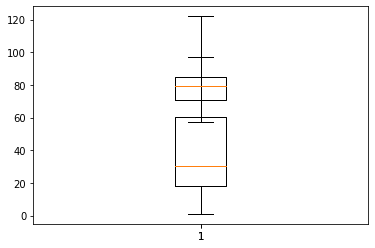

In [48]:
# 2.2. 이상치 처리
# 1) 이상치 확인
# boxplot 그리기 : 각 column(온도와 오존)에 대해 boxplot
df.columns
plt.boxplot(df['Temp']) # 온도에 대한 boxplot : 이상치 없음. -> 제거할 게 없음.
plt.boxplot(df['Ozone']) # 오존에 대한 boxplot : 이상치 2개 있음. -> 제거해야 함.

# 이제 이상치를 어떻게 찾아내는가?

# 진짜 찾아내서 지워야 함.
# Turkey Fence방식으로 IQR 이용해서 이상치 찾아내고 지워야 함.
# IQR = 3사분위값 - 1사분위값
# (3사분위값 + 1.5 * IQR)을 초과하는 값은 이상치, (1사분위값 - 1.5 * IQR) 미만인 값도 이상치.
# 하위 이상치는 존재하지 않았기 때문에, 상위 이상치만 찾아서 제거할 것.

# 수치계산을 해야 하므로, numpy 모듈 이용.
# numpy의 percentile 함수 -> 첫 번째 인자는 자료, 두 번째 인자는 몇 퍼센트 값인지.
q1 = np.percentile(df['Ozone'],25)
q1, q3 = np.percentile(df['Ozone'],[25,75]) # 한 번에 구하고 싶으면 tuple 형태로 받아라.
iqr = q3 - q1
upper = q3 + iqr*1.5
mask = df["Ozone"] > upper  # boolean indexing에서의 mask 역할 
display(df.loc[mask])       # 이상치: dataframe에서 loc이용해서 행을 가져올 수 있음. 
# 이상치 제거하려면 mask를 반대로 해주면 됨.
df = df.loc[~mask]   # 결측치에 이상치까지 제외한 data frame.
display(df)
print("이상치까지 제거한 후 남은 데이터 : {}".format(df.shape))

# 이렇게 하면 결측치, 이상치 제거 작업 끝.


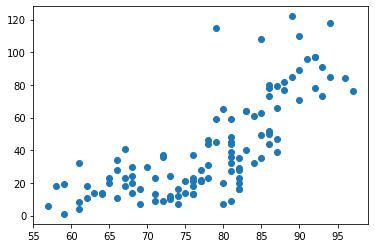

In [32]:
# 3. 확보한 학습데이터가 선형 경향성을 가지고 있는지 확인.
# linear regression 이전에 data의 경향성 확인.
# 가장 흔하게 사용하는 그래프가 산점도.
# scatter 이용해서 데이터의 분포(흩어진 정도, 경향)를 확인.
plt.scatter(df['Temp'], df['Ozone'])
# 데이터 우상향하는 경향성 : 온도가 높아질수록 오존량이 증가하는 경향성.
# 학습할 수 있는 데이터로, 학습을 통해 예측할 수 있다.

,Ozone,Temp,Temp_Norm,Ozone_Norm
0,41.0,67,0.250,0.330579
1,36.0,72,0.375,0.289256
2,12.0,74,0.425,0.090909
3,18.0,62,0.125,0.140496
5,28.0,66,0.225,0.223140
...,...,...,...,...
147,14.0,63,0.150,0.107438
148,30.0,70,0.325,0.239669
150,14.0,75,0.450,0.107438
151,18.0,76,0.475,0.140496


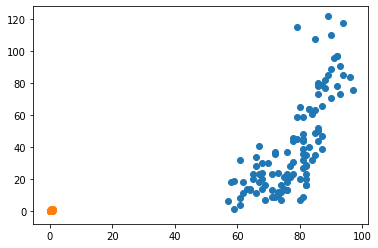

In [34]:
# 데이터를 표준화 방식으로 다시 만들어서 학습을 진행.
# normalization(표준화): 각 데이터를 다음과 같은 방식으로 비율 이용해서 축소시킴.
# 1) 각 요소의 값 -> (요소값 - 전체 데이터의 최솟값) / (전체 데이터의 최댓값 - 전체 데이터의 최솟값)
# 2) 표준화 방식으로 각각의 요소 값들을 바꿔줌.

df["Temp_Norm"] = (df["Temp"]-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())
# broadcasting 되면서 series 
# 이걸 새로운 column으로 만들어줌.
display(df)
# 산점도 그려서 제대로 shrink되었는지 확인. -> 같이 출력함!
plt.scatter(df["Temp"],df["Ozone"])
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])
# 확인작업 : 두 산점도의 생김새가 동일하고 단위만 달라야 함.

In [35]:
# normalize된 데이터를 가지고 학습하면 됨.
# 4. linear regression

# 4-1. training data
x_data = df["Temp_Norm"] # x축 변수
y_data = df["Ozone_Norm"] # y축 변수

# 4-2. placeholder : 입력 파라미터 역할 -> 데이터를 받아들이는 node인 placeholder 정의
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# 4-3. weight,bias
W = tf.Variable(tf.random_normal([1]), name = "weight") # 1차원 값 하나만 정하라는 표사.
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 4-4. 가설 정의
H = W * x + b

# 4-5. cost function 정의
cost = tf.reduce_mean(tf.square(H-y))

# -6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# 4-7. session, 초기화 작업
sess = tf.Session()     
sess.run(tf.global_variables_initializer())

# 4-8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict = {x : x_data,
                                                      y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))


cost값은 : 1.2462890148162842
cost값은 : 0.026449721306562424
cost값은 : 0.026141811162233353
cost값은 : 0.026140287518501282
cost값은 : 0.026140280067920685
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536


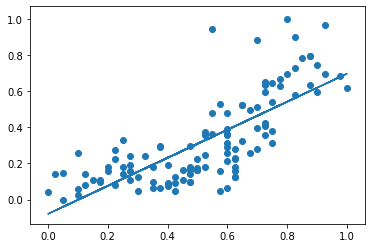

In [36]:
# 학습이 종료된 후 최종적으로 얻은 W와 b의 값을 이용해 산점도와 line graph를 그려보자
plt.scatter(df["Temp_Norm"], df["Ozone_Norm"])
plt.plot(df["Temp_Norm"], df["Temp_Norm"] * sess.run(W) + sess.run(b))

In [40]:
# 학습 종료 후 예측
# ex) 화씨 62도에서의 오존량 예측.

# 화씨 62도에서의 오존량 예측 -> 틀린 값!!!!!!!!!!!  좌표계 바뀌어있음.
print(sess.run(H, feed_dict = {x : 62}))

# normalization된 기온의 값을 구하려면
tmp = (62 - df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
print(sess.run(H, feed_dict = {x : tmp}))

# normalization된 상태에서의 기온 결과값 원상복귀시키면
# 식 변형시킨 것
result_norm = sess.run(H, feed_dict = {x : tmp})
result = result_norm * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()
print(result) -> 이게 맞는 값


[47.97988]
[0.01807752]
[4.018946]


In [ ]:
# 이제 이 데이터를 가장 잘 표현할 수 있는 직선을 그리고 가설을 설정.
# 전처리 끝났으니까 학습만 시키면 됨.

# 4. linear regression

# 4-1. training data
x_data = final_df["Temp"] # x축 변수
y_data = final_df["Ozone"] # y축 변수

# 4-2. placeholder : 입력 파라미터 역할 -> 데이터를 받아들이는 node인 placeholder 정의
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# 4-3. weight,bias
W = tf.Variable(tf.random_normal([1]), name = "weight") # 1차원 값 하나만 정하라는 표사.
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 4-4. 가설 정의
H = W * x + b

# 4-5. cost function 정의
cost = tf.reduce_mean(tf.square(H-y))

# -6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# 4-7. session, 초기화 작업
sess = tf.Session()     
sess.run(tf.global_variables_initializer())

# 4-8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict = {x : x_data,
                                                      y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

# 이렇게 했더니 cost가 702부터 시작해서 nan, nan, ..... -> 발산한다.

In [ ]:
# 정규화 X

# 이제 이 데이터를 가장 잘 표현할 수 있는 직선을 그리고 가설을 설정.
# 전처리 끝났으니까 학습만 시키면 됨.

# 4. linear regression

# 4-1. training data
x_data = final_df["Temp"] # x축 변수
y_data = final_df["Ozone"] # y축 변수

# 4-2. placeholder : 입력 파라미터 역할 -> 데이터를 받아들이는 node인 placeholder 정의
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# 4-3. weight,bias
W = tf.Variable(tf.random_normal([1]), name = "weight") # 1차원 값 하나만 정하라는 표사.
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 4-4. 가설 정의
H = W * x + b

# 4-5. cost function 정의
cost = tf.reduce_mean(tf.square(H-y))

# -6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001)
train = optimizer.minimize(cost)

# 4-7. session, 초기화 장면
sess = tf.Session()     #
sess.run(tf.global_variables_initializer())

# 4-8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict = {x : x_data,
                                                      y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

# 이렇게 했더니 cost가 6406 ->  676, 675, ... -> 발산
# 더 줄인다고 해서 능사는 아님.

# 적절한 값이 있음.

In [ ]:
# 이제 이 데이터를 가장 잘 표현할 수 있는 직선을 그리고 가설을 설정.
# 전처리 끝났으니까 학습만 시키면 됨.

# 4. linear regression

# 4-1. training data
x_data = final_df["Temp"] # x축 변수
y_data = final_df["Ozone"] # y축 변수

# 4-2. placeholder : 입력 파라미터 역할 -> 데이터를 받아들이는 node인 placeholder 정의
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# 4-3. weight,bias
W = tf.Variable(tf.random_normal([1]), name = "weight") # 1차원 값 하나만 정하라는 표사.
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 4-4. 가설 정의
H = W * x + b

# 4-5. cost function 정의
cost = tf.reduce_mean(tf.square(H-y))

# -6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0000001)
train = optimizer.minimize(cost)

# 4-7. session, 초기화
sess = tf.Session()     
sess.run(tf.global_variables_initializer())

# 4-8. 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict = {x : x_data,
                                                      y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

# 건드릴 수 있는 게, 잘못한게 없는 것 같은데도 cost 값이 0까지 안 감.
# 건드릴 수 있는 게 learningrate 하나 뿐인데도 제대로 나오지 않음.

In [ ]:
# 횟수 때문일까? 3000번으로는 택도 없나봐!
# 이제 이 데이터를 가장 잘 표현할 수 있는 직선을 그리고 가설을 설정.
# 전처리 끝났으니까 학습만 시키면 됨.

# 4. linear regression

# 4-1. training data
x_data = final_df["Temp"] # x축 변수
y_data = final_df["Ozone"] # y축 변수

# 4-2. placeholder : 입력 파라미터 역할 -> 데이터를 받아들이는 node인 placeholder 정의
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# 4-3. weight,bias
W = tf.Variable(tf.random_normal([1]), name = "weight") # 1차원 값 하나만 정하라는 표사.
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 4-4. 가설 정의
H = W * x + b

# 4-5. cost function 정의
cost = tf.reduce_mean(tf.square(H-y))

# 4-6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001)
train = optimizer.minimize(cost)

# 4-7. session, 초기화 장면
sess = tf.Session()     #
sess.run(tf.global_variables_initializer())

# 4-8. 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict = {x : x_data,
                                                      y : y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))

# 횟수도 문제가 아니다.

In [ ]:
# 데이터가 이상해. 
# 학습의 횟수도 조절했지만 문제는 해결되지 않음.
# 학습을 하기에 적당한 데이터 형태가아님.
# 표준화 혹은 정규화의 두 방식 중 하나를 이용해서 data 영역을 다시 잡아야 함.
# 비율적으로 data를 0과 1사이 혹은 절댓값 0과 절댓값 1 사이로 줄임.
# 그러면 학습이 잘 일어남.

In [ ]:
# 결국, 결측치, 이상치 처리 이후에 정제된 데이터를 정규화나 표준화를 이용해서 값의 범위를 조절해야 함.
# 그래야 학습이 정상적으로 이루어질 수 있음.